In [6]:
pip install tensorflow numpy matplotlib


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [8]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Option1: Linear  model**

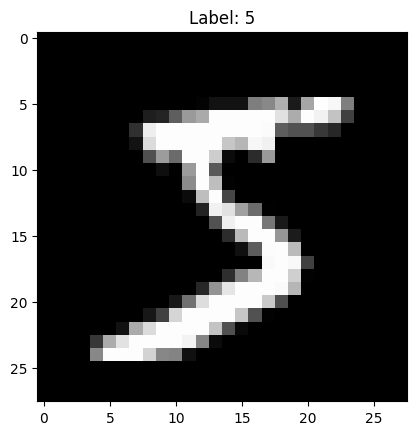

In [10]:
def show_sample(index):
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.show()

show_sample(0)


In [11]:
model_linear = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Convert 2D → 1D
    tf.keras.layers.Dense(10, activation='softmax') # Linear output layer
])

model_linear.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_linear.fit(x_train, y_train, epochs=5)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8145 - loss: 0.7180
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9149 - loss: 0.3096
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9219 - loss: 0.2852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9224 - loss: 0.2763
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9236 - loss: 0.2680


In [12]:
val_loss, val_acc = model_linear.evaluate(x_test, y_test)
print(f"Linear Model Accuracy: {val_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9138 - loss: 0.3046  
Linear Model Accuracy: 0.9250


In [13]:
predictions = model_linear.predict(x_test)
print(f"Label: {y_test[0]}, Prediction: {np.argmax(predictions[0])}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
Label: 7, Prediction: 7


**Option 2 — Deep Neural Network (Better Accuracy)**

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8818 - loss: 0.4041
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9690 - loss: 0.1010
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9807 - loss: 0.0623
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0476
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0387


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9735 - loss: 0.0955
Test Loss: 0.0796, Test Accuracy: 0.9776


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Label: 0
Prediction: 0


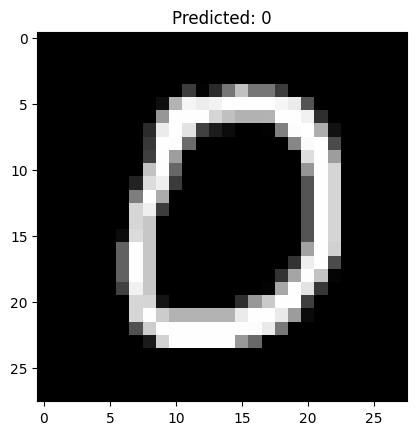

In [16]:
predictions = model.predict(x_test)
index = 10
print(f"Label: {y_test[index]}")
print(f"Prediction: {np.argmax(predictions[index])}")

plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}")
plt.show()


In [17]:
model.save('mnist_digit_classifier.h5')

# Load it later
new_model = tf.keras.models.load_model('mnist_digit_classifier.h5')

# Verify it works
predictions_new = new_model.predict(x_test)
print(f"Label: {y_test[index]}, Prediction: {np.argmax(predictions_new[index])}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Label: 0, Prediction: 0
